# Explore here

In [18]:
!pip install tableone > NULL

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import re
from tableone import TableOne
from scipy.stats import shapiro

In [2]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv'

In [4]:
df = pd.read_csv(url)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# EDA

In [9]:
def binary(data):
  bin_reg = bin_reg = r"^[01](?:\.0)?\.?$"
  if str(data) == 'nan':
    return np.nan
  else:
    return bool(re.findall(bin_reg, str(data)))

def is_binary(df_, col):
  """
  to consider this as a pure binary var take into account that
  the others not reach a limit of range..
  #no puedehaber un porcentaje de varriable superior con más de un  digito!!!!!!
  """
  df = df_.copy()
  percent =  df[col].apply(binary).sum() / df[col].count()
  if percent > 0.5:
    return True
  else:
    return False

In [12]:
def breakdown(df_):
  df = df_.copy()
  normal  = []
  nonormal = []
  binaries = []
  cates = []
  for col in df.columns:
    if df[col].dtypes.name=='int64' or df[col].dtypes.name == 'float64':
      if is_binary(df, col):
        binaries.append(col)
      else:
        if shapiro(df[col]).pvalue > 0.05:
          normal.append(col)
        else:
          nonormal.append(col)
    else:
      cates.append(col)
  return normal, nonormal, binaries +  cates

In [13]:
normal, nonormal, cats = breakdown(df)

In [14]:
normal

[]

In [15]:
nonormal

['age', 'bmi', 'charges']

In [16]:
cats

['children', 'sex', 'smoker', 'region']

In [22]:
TableOne(df, categorical=cats, nonnormal=nonormal, groupby='region', pval=True)

Grouped by region                                                                                                                                      
                                            Missing                  Overall                 northeast                northwest                southeast                southwest P-Value
n                                                                       1338                       324                      325                      364                      325        
age, median [Q1,Q3]                               0         39.0 [27.0,51.0]          39.5 [27.0,51.0]         39.0 [26.0,51.0]         39.0 [26.8,51.0]         39.0 [27.0,51.0]   0.937
sex, n (%)              female                                    662 (49.5)                161 (49.7)               164 (50.5)               175 (48.1)               162 (49.8)   0.933
                        male                                      676 (50.5)                163 (50.3)               161 (49.5)               189 (51.9)               163 (50.2)        
bmi, median [Q1,Q3]                               0         30.4 [26.3,34.7]          28.9 [24.9,32.9]         28.9 [25.7,32.8]         33.3 [28.6,37.8]         30.3 [26.9,34.6]  <0.001
children, n (%)         0                                         574 (42.9)                147 (45.4)               132 (40.6)               157 (43.1)               138 (42.5)   0.543
                        1                                         324 (24.2)                 77 (23.8)                74 (22.8)                95 (26.1)                78 (24.0)        
                        2                                         240 (17.9)                 51 (15.7)                66 (20.3)                66 (18.1)                57 (17.5)        
                        3                                         157 (11.7)                 39 (12.0)                46 (14.2)                 35 (9.6)                37 (11.4)        
                        4                                           25 (1.9)                   7 (2.2)                  6 (1.8)                  5 (1.4)                  7 (2.2)        
                        5                                           18 (1.3)                   3 (0.9)                  1 (0.3)                  6 (1.6)                  8 (2.5)        
smoker, n (%)           no                                       1064 (79.5)                257 (79.3)               267 (82.2)               273 (75.0)               267 (82.2)   0.062
                        yes                                       274 (20.5)                 67 (20.7)                58 (17.8)                91 (25.0)                58 (17.8)        
region, n (%)           northeast                                 324 (24.2)               324 (100.0)                  0 (0.0)                  0 (0.0)                  0 (0.0)  <0.001
                        northwest                                 325 (24.3)                   0 (0.0)              325 (100.0)                  0 (0.0)                  0 (0.0)        
                        southeast                                 364 (27.2)                   0 (0.0)                  0 (0.0)              364 (100.0)                  0 (0.0)        
                        southwest                                 325 (24.3)                   0 (0.0)                  0 (0.0)                  0 (0.0)              325 (100.0)        
charges, median [Q1,Q3]                           0  9382.0 [4740.3,16639.9]  10057.7 [5194.3,16687.4]  8965.8 [4719.7,14711.7]  9294.1 [4440.9,19526.3]  8798.6 [4751.1,13462.5]   0.192

In [29]:
TableOne(df, categorical=cats, nonnormal=nonormal, groupby='sex', pval=True)

Grouped by sex                                                                                   
                                         Missing                  Overall                   female                     male P-Value
n                                                                    1338                      662                      676        
age, median [Q1,Q3]                            0         39.0 [27.0,51.0]         40.0 [27.0,51.8]         39.0 [26.0,51.0]   0.447
sex, n (%)              female                                 662 (49.5)              662 (100.0)                  0 (0.0)  <0.001
                        male                                   676 (50.5)                  0 (0.0)              676 (100.0)        
bmi, median [Q1,Q3]                            0         30.4 [26.3,34.7]         30.1 [26.1,34.3]         30.7 [26.4,35.0]   0.101
children, n (%)         0                                      574 (42.9)               289 (43.7)               285 (42.2)   0.981
                        1                                      324 (24.2)               158 (23.9)               166 (24.6)        
                        2                                      240 (17.9)               119 (18.0)               121 (17.9)        
                        3                                      157 (11.7)                77 (11.6)                80 (11.8)        
                        4                                        25 (1.9)                 11 (1.7)                 14 (2.1)        
                        5                                        18 (1.3)                  8 (1.2)                 10 (1.5)        
smoker, n (%)           no                                    1064 (79.5)               547 (82.6)               517 (76.5)   0.007
                        yes                                    274 (20.5)               115 (17.4)               159 (23.5)        
region, n (%)           northeast                              324 (24.2)               161 (24.3)               163 (24.1)   0.933
                        northwest                              325 (24.3)               164 (24.8)               161 (23.8)        
                        southeast                              364 (27.2)               175 (26.4)               189 (28.0)        
                        southwest                              325 (24.3)               162 (24.5)               163 (24.1)        
charges, median [Q1,Q3]                        0  9382.0 [4740.3,16639.9]  9413.0 [4885.2,14454.7]  9369.6 [4619.1,18989.6]   0.729

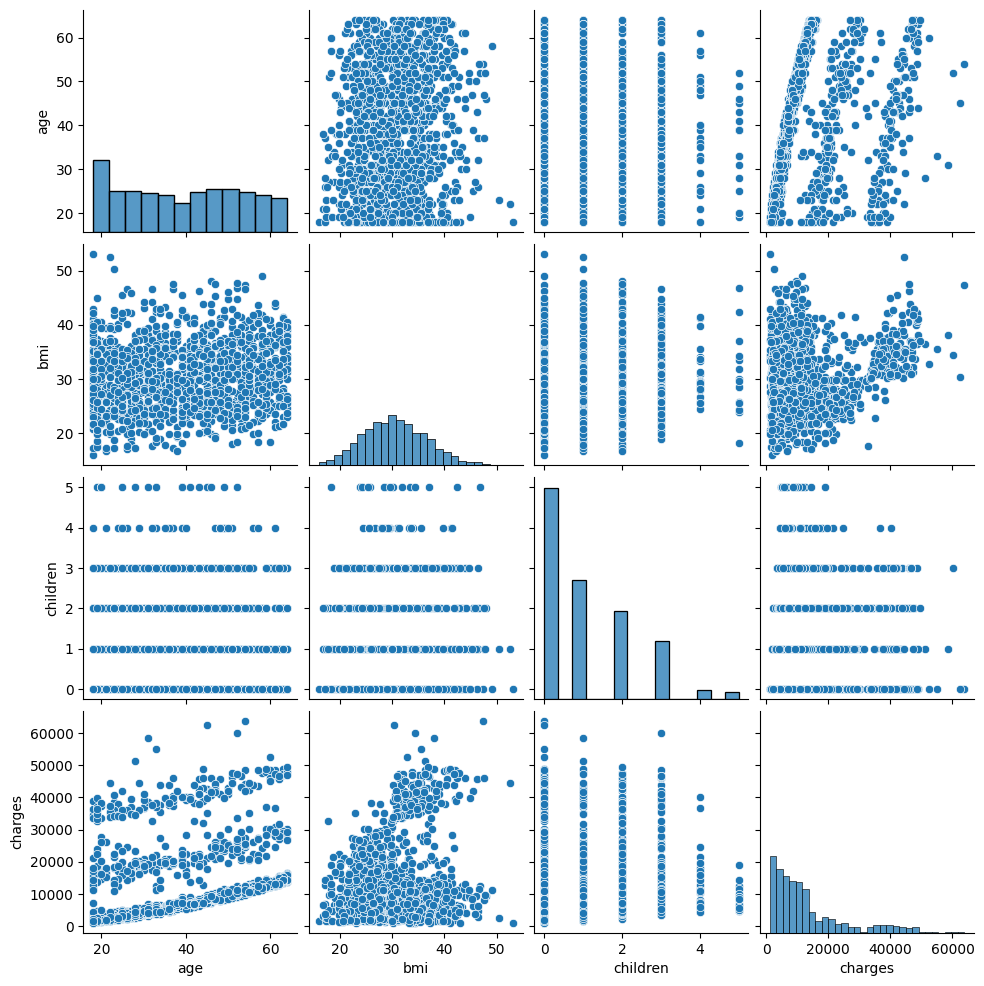

In [26]:
sns.pairplot(df)
plt.show()

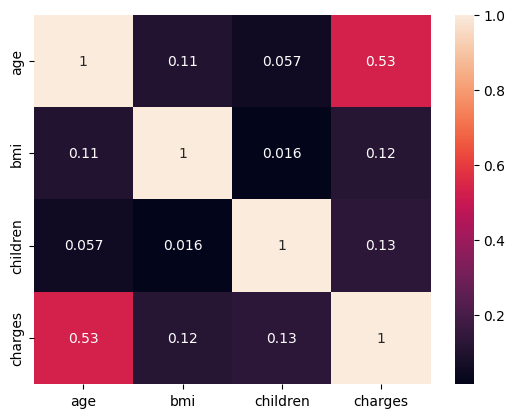

In [28]:
sns.heatmap(df.corr(method='spearman', numeric_only=True), annot=True)
plt.show()

# Build a linear regression model

In [32]:
print(smf.ols('charges ~ age + sex + bmi + children + smoker + region', data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Thu, 10 Jul 2025   Prob (F-statistic):               0.00
Time:                        20:51:04   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.194e+04    

In [35]:
df_l = df.copy()
df_l = df_l.apply(lambda x: np.log(x) if x.name in ['age', 'bmi'] else x)


In [36]:
print(smf.ols('charges ~ age + sex + bmi + children + smoker + region', data=df_l).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     484.3
Date:                Thu, 10 Jul 2025   Prob (F-statistic):               0.00
Time:                        20:54:17   Log-Likelihood:                -13565.
No. Observations:                1338   AIC:                         2.715e+04
Df Residuals:                    1329   BIC:                         2.719e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -5.885e+04   3

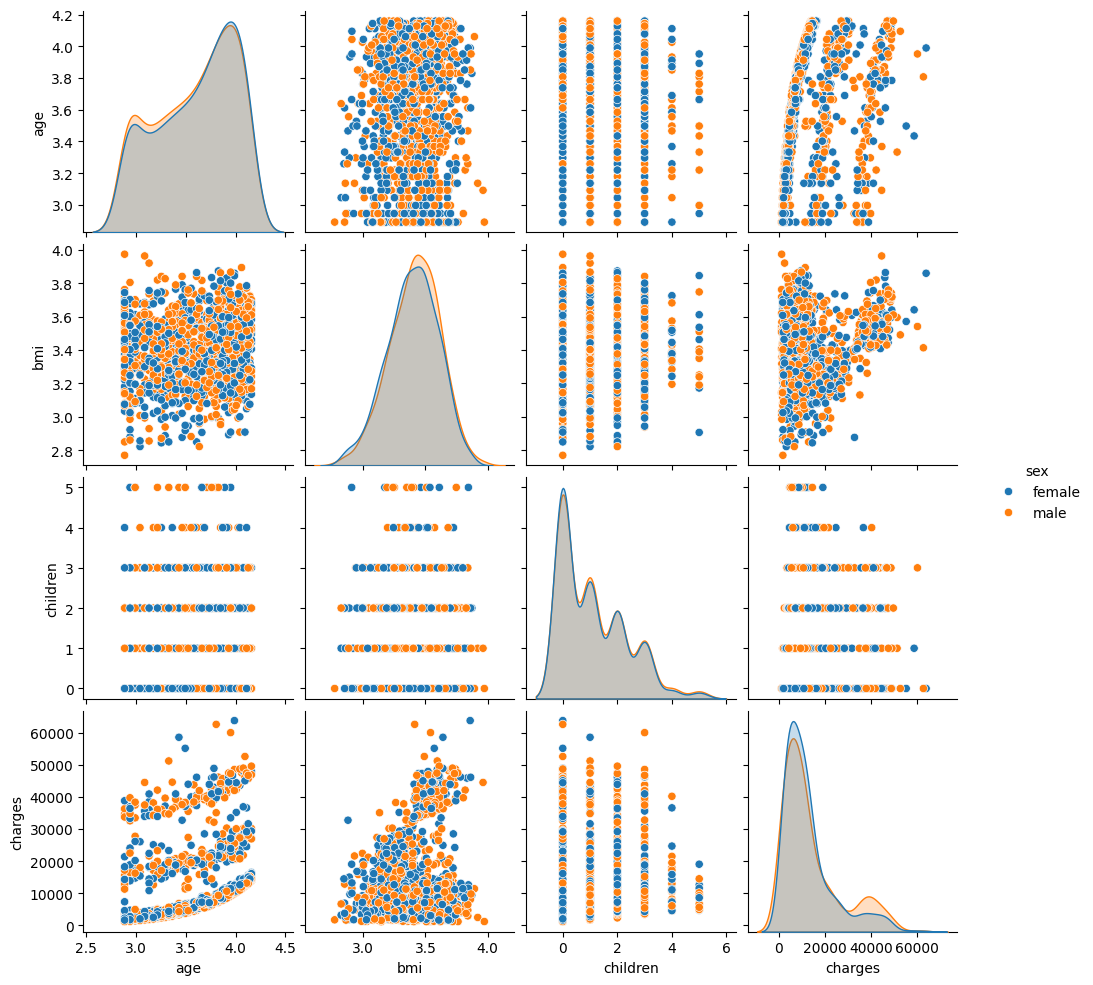

In [38]:
sns.pairplot(df_l, hue='sex')
plt.show()

In [44]:
df_c = df.copy()
df_c['smoker'] = df_c['smoker'].apply(lambda x: 1 if x == 'yes' else 0)
df_c['sex'] = df_c['sex'].apply(lambda x: 1 if x == 'female' else 0)

df_c

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [50]:
regions = df_c['region'].unique()
n_regions = [1, 2, 3, 4]
region_dict = dict(zip(regions, n_regions))
region_dict

{'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4}

In [51]:
df_c['region'] = df_c['region'].map(region_dict)
df_c

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,4,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


In [52]:
print(smf.ols('charges ~ age + sex + bmi + children + smoker + region', data=df_c).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Thu, 10 Jul 2025   Prob (F-statistic):               0.00
Time:                        21:15:16   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.336e+04   1087.672    -12.284      0.0

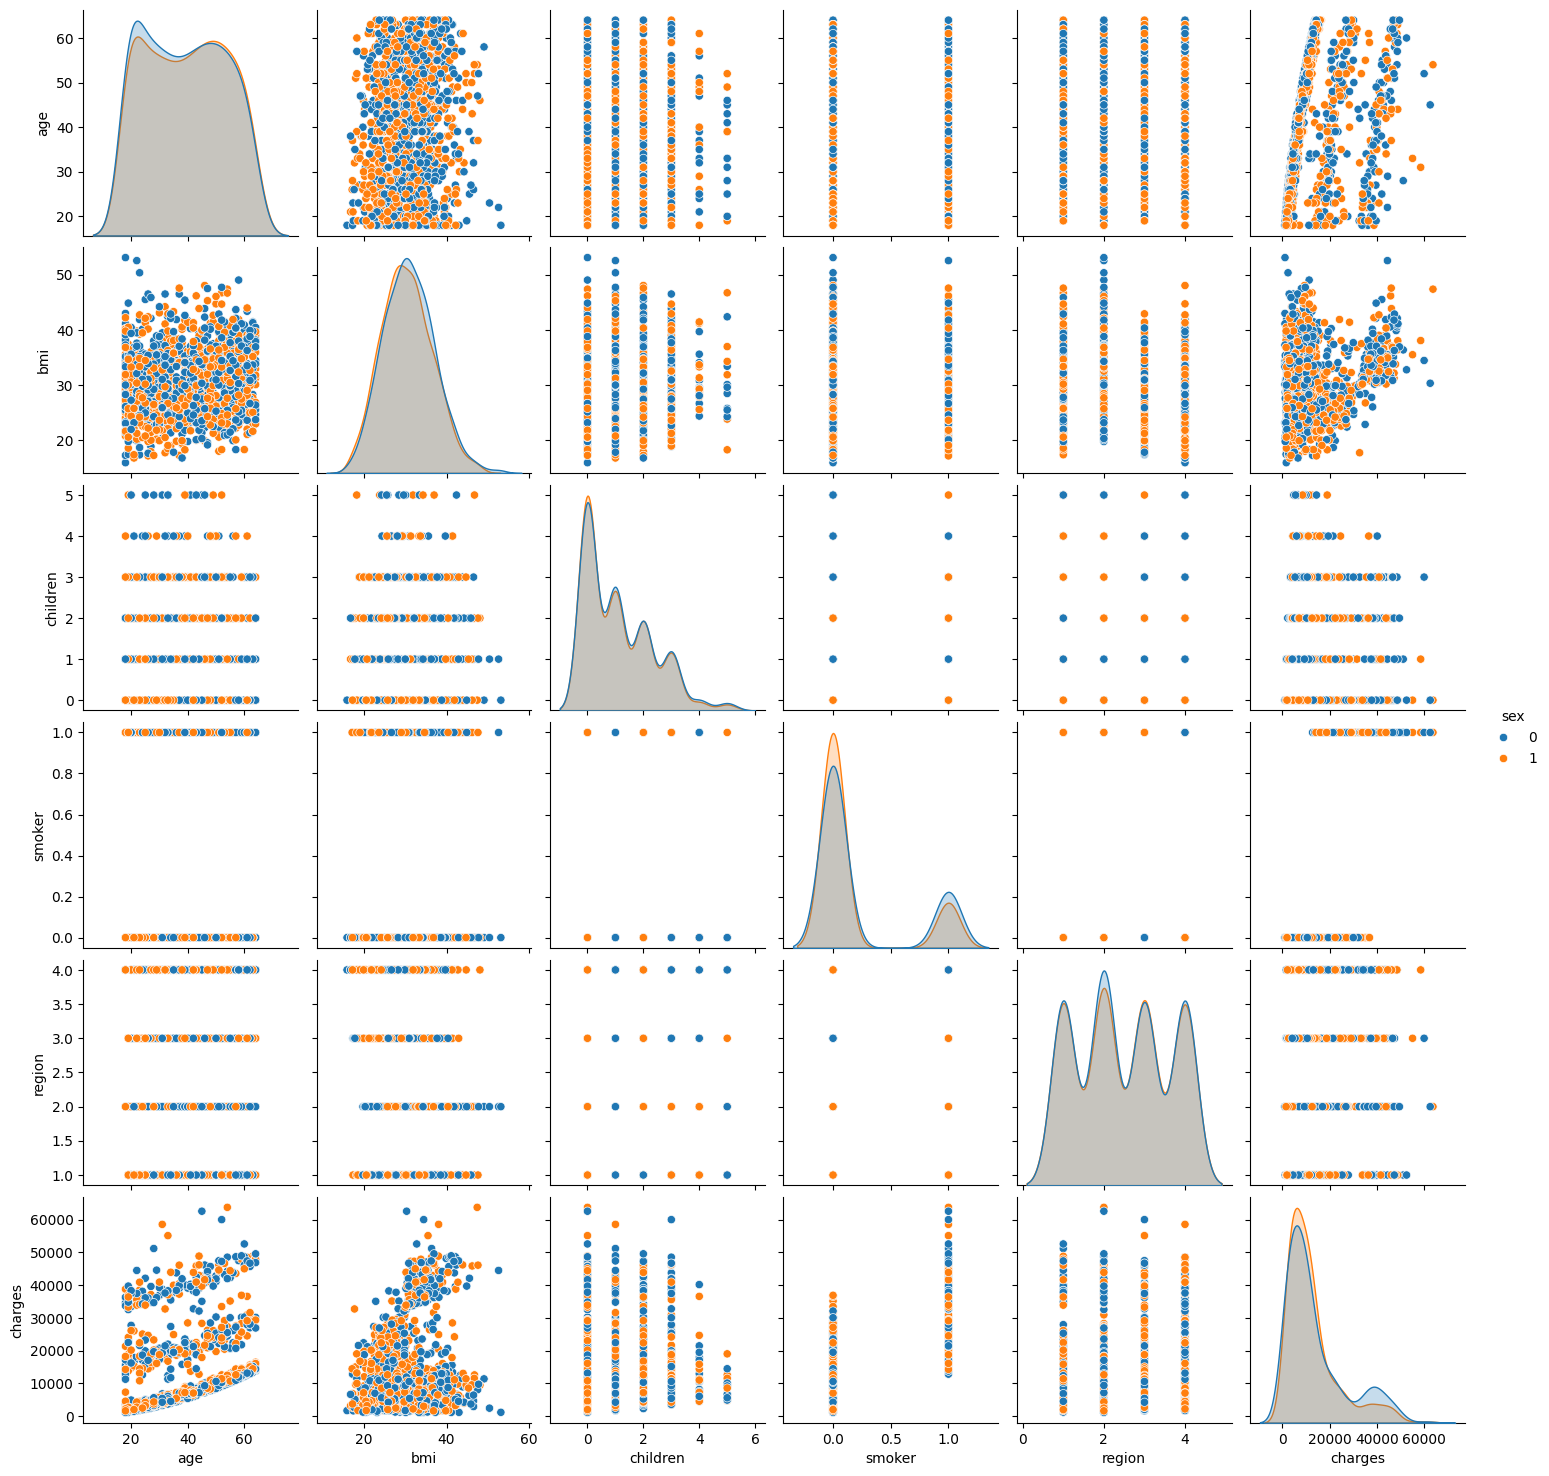

In [53]:
sns.pairplot(df_c, hue='sex')
plt.show()